# Lecture Video Fragmentation using Universal Sentence Encoder

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
import datetime
import math

from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import RegexpParser

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

We'll be using this regular expression to chunk the parsed text into noun phrases

In [ ]:
NP = r"""
    NBAR:
        {<DT>?<NN.*|JJ>*<NN.*>}
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}
"""
NP_chunker = RegexpParser(NP)

Load the Universal Sentence Encoder model

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


Read the subtitle file and GT file

In [ ]:
#def read_file(path):
# file = open(path)
# content = file.read().split("\n")
#  file.close()
#  start_times = []
#  sentences = []
#  for i in range(0, len(content), 2):
#    if (len(str(content[i])) > 0 and len(str(content[i + 1])) > 0):
#      start_time = str(content[i]).split(":")
#      hour = 0
#      minute = 0
#      seconds = int(start_time[1])
#      if (int(start_time[0]) >= 60):
#        hour = int(start_time[0]) // 60
#        minute = int(start_time[0]) % 60
#      else:
#        minute = int(start_time[0])
#      date_time_value = datetime.time(hour, minute, seconds)
#      start_times.append(date_time_value)
#      sentences.append(content[i + 1])
#  return sentences, start_times
#
#def read_gt_file(path):
#    file = open(path)
#    content = file.read().split("\n")
#    file.close()
#    start_times = []
#    for line in content:
#        line_content = line.split(" ")
#        time_string = line_content[0]
#        start_times.append(datetime.datetime.strptime(time_string, "%H:%M:%S"))
#    return start_times
  
#subtitles, init_times = read_file("/content/sample_data/Data 3.txt")
#gt_start_times = read_gt_file("/content/sample_data/GT3.txt")

#print(len(subtitles), len(init_times))
#print(gt_start_times[0:2])
#print("no. of actual segments: " + str(len(gt_start_times)))

Clean the text (tokenizing, POS tagging and NP (Noun Phrase) chunking)

In [ ]:
pip install pysub-parser

     |████████████████████████████████| 245kB 13.2MB/s 


In [ ]:
from pysubparser import parser
from pysubparser.cleaners import brackets, lower_case, formatting
import datetime

In [ ]:
subs = parser.parse(
    "/content/sample_data/0003.srt")

subs = brackets.clean(
    lower_case.clean(
        formatting.clean(
            subs
        )
    )
)

init_times = []
subtitles = []
for sub in subs:
  subtitles.append(sub.text)
  init_times.append(sub.start)

gt_file = open(
    "/content/sample_data/0003.txt", "r")
gt_file_content = gt_file.read().split("\n")
gt_start_times = []
for fc in gt_file_content:
    st_time = fc.split("\t")
    if (len(st_time) > 1):
        gt_start_times.append(
            datetime.datetime.strptime(st_time[1], "%H:%M:%S,%f"))
gt_file.close()

In [ ]:
def prepare_text(subs):
    sentences = []
    for s in subs:
        sentences.append(s)

    sentences = [word_tokenize(sent) for sent in sentences]
    sentences = [pos_tag(w) for w in sentences]
    sentences = [NP_chunker.parse(sent) for sent in sentences]
    return sentences


def parsed_text_to_noun_phrases(sentences):
    nps = []
    for sent in sentences:
        tree = NP_chunker.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == "NP":
                t = subtree
                t = ' '.join(word for word, tag in t.leaves())
                nps.append(t)
    return nps

cleaned_text = prepare_text(subtitles)
noun_phrases = parsed_text_to_noun_phrases(cleaned_text)
print(noun_phrases)
print("Number of noun phrases: " + str(len(noun_phrases)))

['example', 'different edges', 'i', 'the space', 'edge', 'partitions', 'pieces', 'i', 'another piece', 'cetera', 'a whole bunch', 'some problems', 'i', 'i', 'another tree', 'ok', 'i', 'this out', 'look', 'some wearing', 'the edges', 'a whole bunch', 'subproblems', 'an approach', 'dynamic programming', 'a surprise', 'yes', 'tree exhibits', 'powerful properties', 'ok', 'the clues', 'dynamic programming', 'club', 'powerful technique', 'the whole', 'greedy algorithms', 'a thing', 'the greedy', 'choice', 'cause', 'these hallmarks', 'the kind', 'thing', 'boxes', 'the clues', 'this property', 'greedy choice problem show', 'this case', 'choice property', 'dynamic programming', 'dynamic programming properties', 'a clue', 'yes', 'this greedy property', 'something', 'dynamic programming', 'dynamic programming', 'whoa', 'the theorem', 'proof', 'this idea', 'c', 'these hallmarks', 'things', 'heuristics', 'an algorithm', 'dynamic programming', 'work', 'greedy algorithms work', 'i', 'the kind', 'stru

From this point on we take the sentences and concatenate them to form strings of a fixed length *n*. We call these strings "windows" and we increment each window with a step size of *n/12*.

*   After building the windows, we use the Universal Sentence Encoder to generate word embeddings for each string.
*   We then use these embeddings to calculate the cosine similarity between two consecutive windows.
*   The cosine similarity values are then plotted on a line chart which helps us understand the semantic similarity between consecutive windows.
*   The local minimas at every point are where the previous and next segments are the least related, and they are taken as a candidate where we can segment the video
*   Out of all the minimas, we pick the best points under a given threshold and evaluate them
*   depth = peak value(left) + peak value(right)
*   mew = np.mean(depths)
*   sigma = np.std(depths)
*   threshold = m * (mew - sigma)



Window size:  840 Step size:  70
1656
Threshold:  0.020506875962018965
no of boundaries 6
Boundary 		 Actual Start Time 	 Difference in Seconds:
1900-01-01 00:19:03.980000	1900-01-01 00:18:18.110000	45.87
1900-01-01 00:50:21.600000	1900-01-01 00:50:25.030000	3.43
1900-01-01 01:03:15.560000	1900-01-01 01:02:29.840000	45.72
Number of segments predicted: 3
no. of actual segments: 20

Precision: 0.5 Recall: 0.15 F-Score: 0.23076923076923075


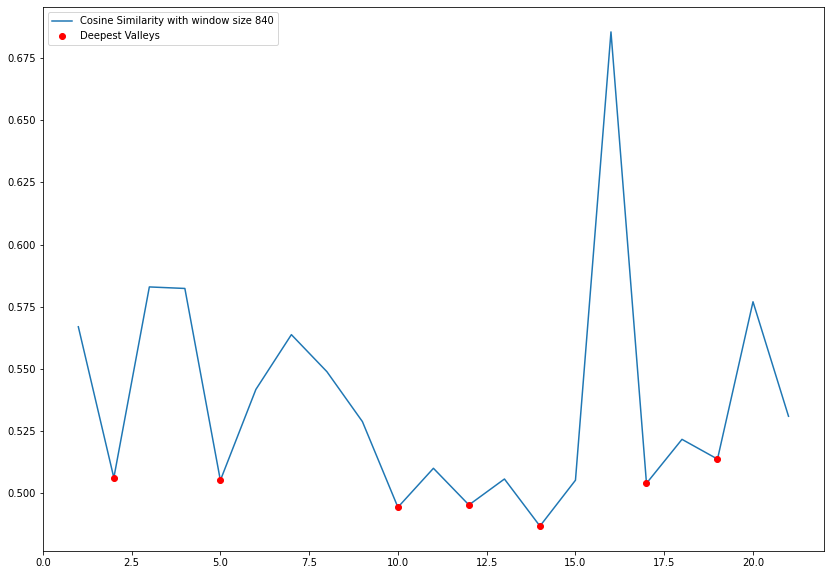

In [ ]:
def build_sliding_window(init_times, sequence, window_size, step_size):
  req_chunks = []
  req_window_start_times = []
  curr_window_start = 0
  curr_window_end = step_size
  print(len(init_times))
  while (curr_window_end <= len(sequence)):
    req_chunks.append(sequence[curr_window_start : curr_window_end])
    req_window_start_times.append(init_times[curr_window_start])
    curr_window_start += step_size
    curr_window_end += step_size

  return req_chunks, req_window_start_times


def normalise_chunks(sentence_chunks):
  sentences = []
  for chunk in sentence_chunks:
    sentences.append(chunk[0])
  return sentences


def plot_fig(x, score, heading, fig_no, can_plot):
  if can_plot:
    fig = plt.figure(fig_no, figsize=(14, 10))
    ax = fig.add_subplot(111)
    ax.plot(x, score, label=heading)

  score_arr = np.array(score)
  x_arr = np.array(x)
  b = (np.diff(np.sign(np.diff(score_arr))) > 0).nonzero()[0] + 1  # Local minimas

  prev_index = 0
  peak_values = []
  for minima_index in range(0, len(b) - 1):
    peak_left = -1
    for left_val in range(prev_index, b[minima_index]):
      if (score_arr[left_val] > peak_left):
        peak_left = score_arr[left_val]

    peak_right = -1
    for right_val in range(b[minima_index], b[minima_index + 1]):
      if (score_arr[right_val] > peak_right):
        peak_right = score_arr[right_val]

    prev_index = b[minima_index]
    peak_values.append((peak_left, peak_right))

  depth_values = []
  for i in range(0, len(peak_values)):
    depth_val = (peak_values[i][0] - score_arr[b[i]]) + (peak_values[i][1] - score_arr[b[i]])
    depth_values.append((depth_val, b[i]))

  if can_plot:
    ax.plot(x_arr[b], score_arr[b], "o", label="Deepest Valleys", color='r')
    ax.legend()

  return b, depth_values

def vectorise(sentences, sentence_len, fig_no):
  sentence_embeddings = embed(sentences)
  score = []
  for i in range(0, len(sentence_embeddings) - 2):
    x = tf.nn.l2_normalize(sentence_embeddings[i:i+1], axis=1)
    y = tf.nn.l2_normalize(sentence_embeddings[i+1:i+2], axis=1)
    cos_sim = tf.reduce_sum(tf.multiply(x, y), axis=1)
    # score.append(cos_sim[0])
    clip_cosine_similarities = tf.clip_by_value(cos_sim, -1.0, 1.0)
    scores = 1.0 - tf.acos(clip_cosine_similarities) / math.pi
    score.append(scores[0])
  # Plotting Cosine Similarity
  minimas, depth_values = plot_fig(range(1, len(sentence_embeddings) - 1), score,
                      'Cosine Similarity with window size ' + str(sentence_len), fig_no, True)
  return score, minimas, depth_values


def get_best_points(messages, minimas, window_start_times, depth_values):
  selected_windows = []
  cos_sim_values = []
  for minima_pair in minimas:
    cos_sim_values.append(np.float(minima_pair[0]))

  m = 0.3
  depths = []
  for d in depth_values:
    depths.append(d[0])
  mew = np.mean(depths)
  sigma = np.std(depths)
  threshold = m * (mew - sigma)
  print("Threshold: ", threshold)

  for d_val in depth_values:
    if (d_val[0] > threshold):
      selected_windows.append(window_start_times[d_val[1]])

  return selected_windows


window_size = 840
step_size = window_size // 12
print("\nWindow size: ", window_size, "Step size: ", step_size)

chunks, window_start_times = build_sliding_window(init_times, subtitles, window_size, step_size)
messages = normalise_chunks(chunks)

# vectorising
cos_sim_scores, loc_minimas, depth_values = vectorise(messages, window_size, 1)

minimas = []
for i in loc_minimas:
  minimas.append((cos_sim_scores[i], i))

boundaries = get_best_points(messages, minimas, window_start_times, depth_values)

# for b in boundaries:
#   print(b)

print("no of boundaries " + str(len(boundaries)))
pos_predictions = 0

output_file = open("./output.txt", "a")
output_file.write("\nWindow size: " + str(window_size) + " Step size: " + str(step_size))
print("Boundary \t\t Actual Start Time \t Difference in Seconds:")
for i in range(0, len(gt_start_times)):
  min_diff = 999
  boundary_date = ""
  for j in range(0, len(boundaries)):
    dt = datetime.datetime.combine(datetime.date(1900, 1, 1), boundaries[j])
    diff = gt_start_times[i] - dt
    if (abs(diff.total_seconds()) <= 60):
      if (abs(diff.total_seconds()) < min_diff):
        min_diff = abs(diff.total_seconds())
        boundary_date = dt

  if (min_diff <= 90):
    pos_predictions += 1
    output_file.write("\nboundary: " + str(boundary_date))
    output_file.write("\tactual start time: " + str(gt_start_times[i]))
    output_file.write("\tdifference in seconds: " + str(min_diff))
    print(str(boundary_date)+"\t"+str(gt_start_times[i])+"\t"+str(min_diff))
    #print("\nboundary: " + str(boundary_date))
    #print("actual start time: " + str(gt_start_times[i]))
    #print("difference in seconds: " + str(min_diff))

print("Number of segments predicted: " + str(pos_predictions))
print("no. of actual segments: " + str(len(gt_start_times)))
output_file.write("\nNumber of segments predicted: " + str(pos_predictions))
p = pos_predictions / len(boundaries)
r = pos_predictions / len(gt_start_times)
f = (2 * p * r) / (p + r)
print("\nPrecision: " + str(p), "Recall: " + str(r), "F-Score: " + str(f))
output_file.write("\nPrecision: " + str(p) + "Recall: " + str(r) + "F-Score: " + str(f))
output_file.close()